<a href="https://colab.research.google.com/github/AiniNurM/Latihan-Python/blob/main/Analisis_Data_Video_game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("figures", exist_ok=True)

# style visualisasi

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Load Dataset

file_path = "/content/drive/MyDrive/Colab Notebooks/vgsales.csv"
try:
    df = pd.read_csv(file_path, sep=";")
except Exception as e:
    print("Error:", e)




In [ ]:
print("Ukuran dataset:", df.shape)
print("\nNama Kolom:", df.columns.tolist())
print("\n5 baris pertama:")
display(df.head())

Ukuran dataset: (16598, 11)

Nama Kolom: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

5 baris pertama:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Info dataset

print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
display(df.describe(include="all"))


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16572 non-null  object 
 3   Year          16301 non-null  float64
 4   Genre         16572 non-null  object 
 5   Publisher     16514 non-null  object 
 6   NA_Sales      16572 non-null  float64
 7   EU_Sales      16572 non-null  float64
 8   JP_Sales      16572 non-null  float64
 9   Other_Sales   16572 non-null  float64
 10  Global_Sales  16572 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

Statistik deskriptif:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16572,16301.000000,16572,16514,16572.000000,16572.000000,16572.000000,16572.000000,16572.000000
unique,NaN,11487,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3313,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.396847,NaN,NaN,0.265071,0.146872,0.077843,0.048132,0.538194
std,4791.853933,NaN,NaN,5.828025,NaN,NaN,0.817260,0.505716,0.309525,0.188728,1.556130
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


In [ ]:
# Data Cleaning
# Missing vlaues

print("\nMissing values per kolom:")
print(df.isnull().sum())


Missing values per kolom:
Rank              0
Name              0
Platform         26
Year            297
Genre            26
Publisher        84
NA_Sales         26
EU_Sales         26
JP_Sales         26
Other_Sales      26
Global_Sales     26
dtype: int64


In [ ]:
print("\nMissing values per kolom sebelum cleaning:")
print(df.isnull().sum())


Missing values per kolom sebelum cleaning:
Rank              0
Name              0
Platform         26
Year            297
Genre            26
Publisher        84
NA_Sales         26
EU_Sales         26
JP_Sales         26
Other_Sales      26
Global_Sales     26
dtype: int64


In [ ]:
# isi year dengan median

df["Year"] = df["Year"].fillna(df["Year"].median())

# Publisher diisi unknown

df["Publisher"] = df["Publisher"].fillna("Unknown")

# genre & platform dihapus

df = df.dropna(subset=["Platform", "Genre"])

# Sales EU NA JP Other Global dihapus

df = df.dropna(subset=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])

print("\nMissing values setelah cleaning:")
print(df.isnull().sum())
print("Ukuran dataset setelah cleaning:", df.shape)


Missing values setelah cleaning:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Ukuran dataset setelah cleaning: (16572, 11)


In [ ]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


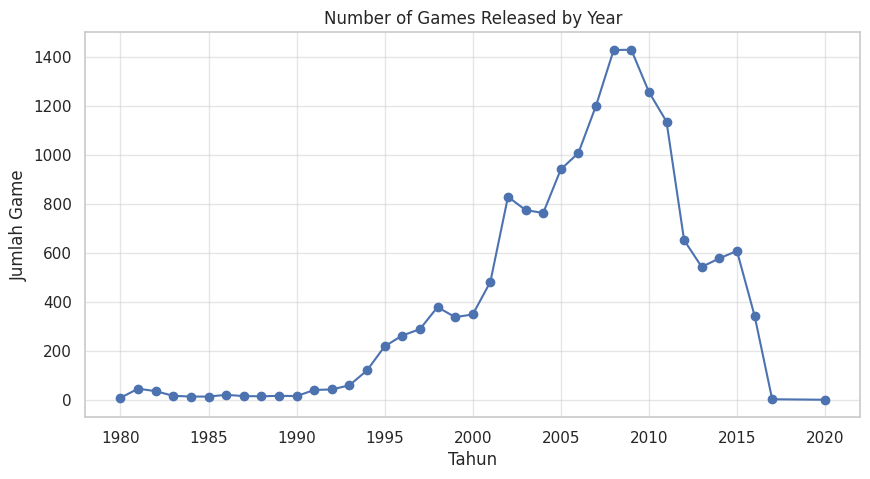

In [76]:
# @title VISUALISASI ANALISIS DATASET

# Line chart untuk analisis jumlah rilis game per tahun

games_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
games_per_year.plot(kind="line", marker="o")
plt.title("Number of Games Released by Year")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Game")
plt.grid(True, alpha=0.5)
plt.savefig("figures/Number of Games Released by Year.png", dpi=300, bbox_inches="tight")
plt.show()



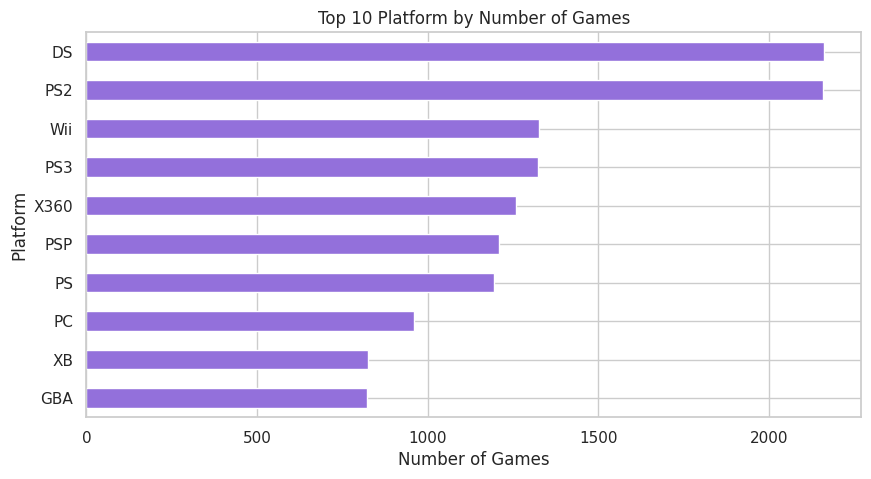

In [79]:
# Bar Chart horizontal untuk melihat distribusi game per platform (20 ter-atas)

games_per_platform = df['Platform'].value_counts().head(10)
plt.figure(figsize=(10,5))
games_per_platform.plot(kind="barh", color="mediumpurple")
plt.title("Top 10 Platform by Number of Games")
plt.xlabel("Number of Games")
plt.ylabel("Platform")
plt.gca().invert_yaxis()
plt.savefig("figures/Top 10 Platform by number of Games.png", dpi=300, bbox_inches="tight")
plt.show()


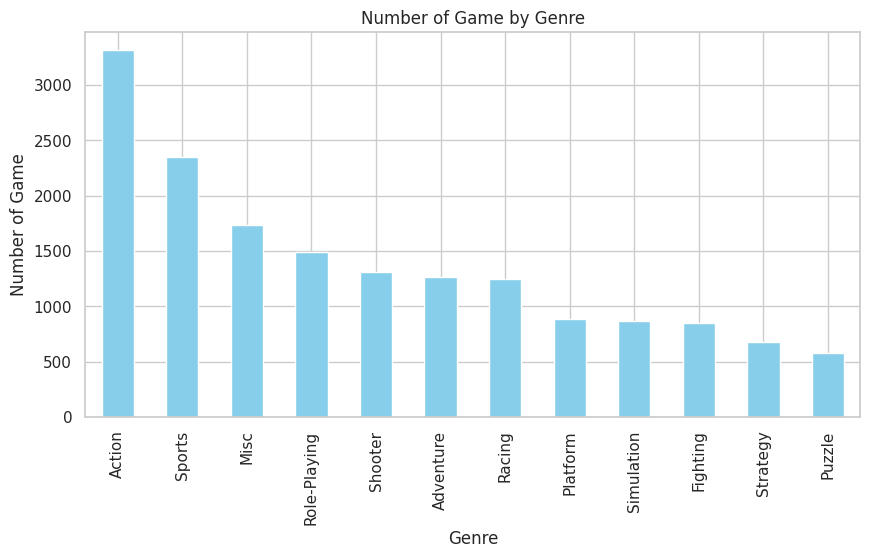

In [78]:
# Bar Chart untuk melihat Jumlah game per genre

games_per_genre = df['Genre'].value_counts()
plt.figure(figsize=(10,5))
games_per_genre.plot(kind="bar", color="skyblue")
plt.title("Number of Game by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Game")
plt.savefig("figures/Number of Game by Genre.png", dpi=300, bbox_inches="tight")
plt.show()


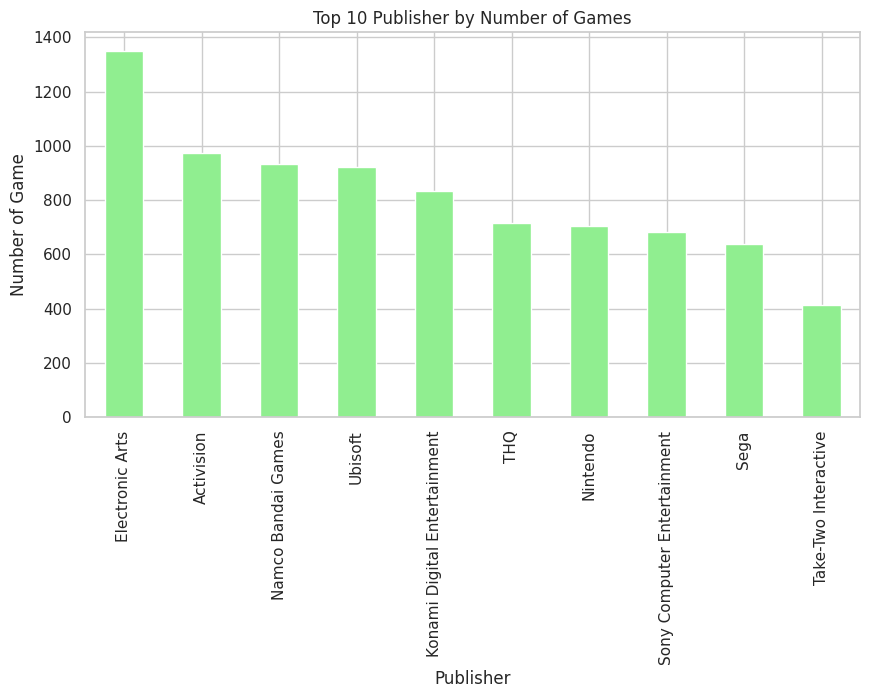

In [80]:
# Bar Chart analisis distribusi jumlah game per publisher

games_per_publisher = df['Publisher'].value_counts().head(10)
plt.figure(figsize=(10,5))
games_per_publisher.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Publisher by Number of Games")
plt.xlabel("Publisher")
plt.ylabel("Number of Game")
plt.savefig("figures/Top 10 Publisher by Number of Games.png", dpi=300, bbox_inches="tight")
plt.show()

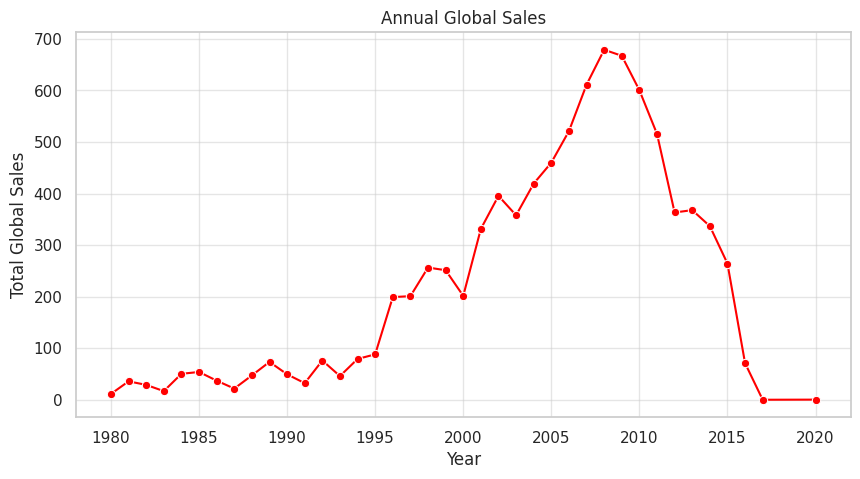

In [81]:
# Line Chart Total Penjualan global per Tahun

sales_per_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=sales_per_year, x='Year', y='Global_Sales', marker='o', color='red')
plt.title("Annual Global Sales")
plt.ylabel("Total Global Sales")
plt.xlabel("Year")
plt.grid(True, alpha=0.5)
plt.savefig("figures/Annual Global Sales.png", dpi=300, bbox_inches="tight")
plt.show()



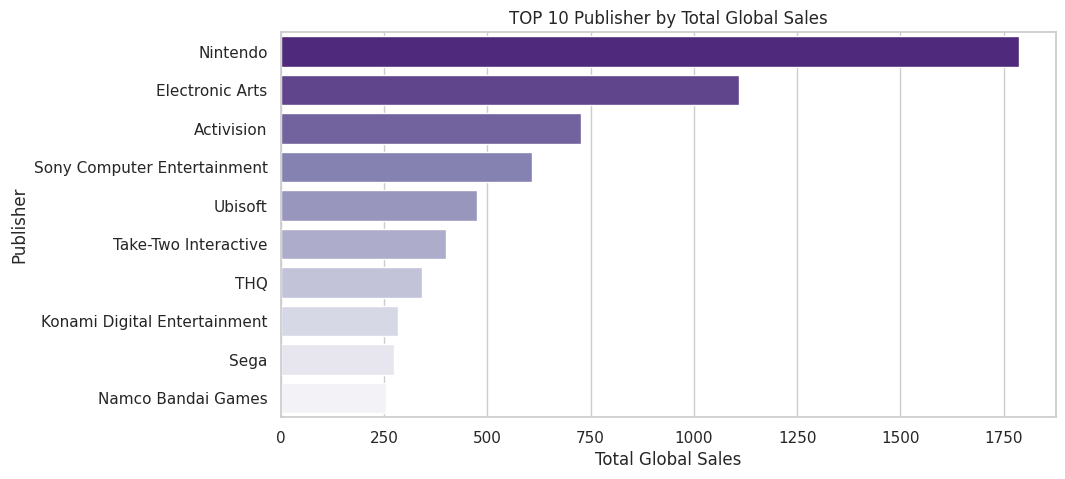

In [82]:
# BarPlot TOP 10 publisher dengan sales terbanyak

sales_per_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=sales_per_publisher,
    x='Global_Sales',
    y='Publisher',
    hue='Publisher',
    palette="Purples_r",
    legend=False
)

plt.title("TOP 10 Publisher by Total Global Sales")
plt.xlabel("Total Global Sales")
plt.ylabel("Publisher")
plt.savefig("figures/TOP 10 Publisher by Total Global Sales.png", dpi=300, bbox_inches="tight")
plt.show()

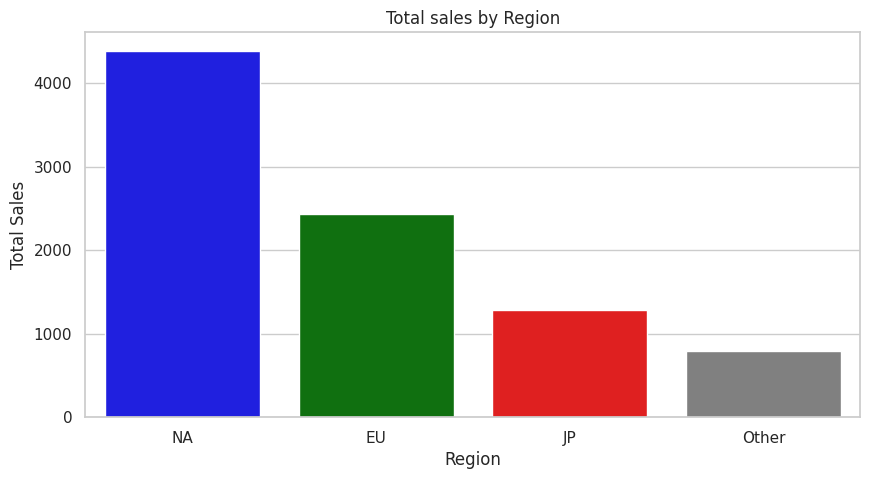

In [83]:
# Barplot perbandingan sales tiap wilayah

region_sales = pd.DataFrame({
    'Region': ['NA', 'EU', 'JP', 'Other'],
    'Total_Sales': [
        df['NA_Sales'].sum(),
        df['EU_Sales'].sum(),
        df['JP_Sales'].sum(),
        df['Other_Sales'].sum(),
    ]

})

plt.figure(figsize=(10,5))
sns.barplot(
    data=region_sales,
    x='Region',
    y='Total_Sales',
    hue='Region',
    palette=['Blue','Green','Red','Grey'],
    legend=False
)

plt.title("Total sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.savefig("figures/Total sales by Region.png", dpi=300, bbox_inches="tight")
plt.show()




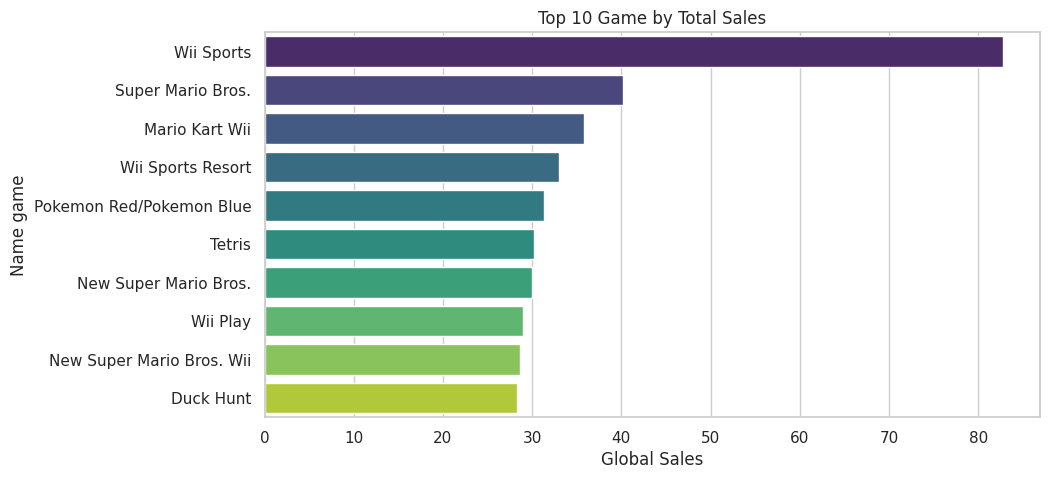

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


In [84]:
# Barplot TOP 10 Games by Total Global sales

game_by_sales = df.sort_values(by="Global_Sales", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    data=game_by_sales,
    x='Global_Sales',
    y='Name',
    hue='Name',
    palette="viridis",
    legend=False
)
plt.title("Top 10 Game by Total Sales")
plt.xlabel("Global Sales")
plt.ylabel("Name game")
plt.savefig("figures/TOP 10 Games by Total Sales.png", dpi=300, bbox_inches="tight")
plt.show()

game_by_sales[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]


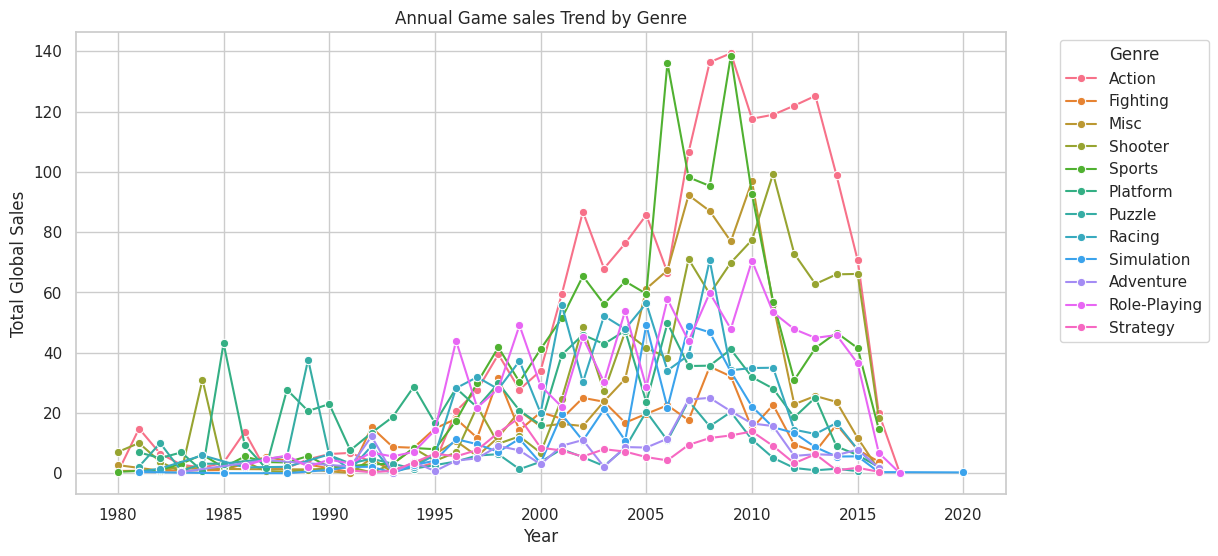

In [85]:
# Line chart tren penjualan game per tahun berdasarkan genre

sales_genre_year = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales_genre_year,
    x="Year",
    y="Global_Sales",
    hue="Genre",
    marker="o",
)

plt.title("Annual Game sales Trend by Genre")
plt.xlabel("Year")
plt.ylabel("Total Global Sales")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("figures/Annual Game Sales Trend by Genre.png", dpi=300, bbox_inches="tight")
plt.show()

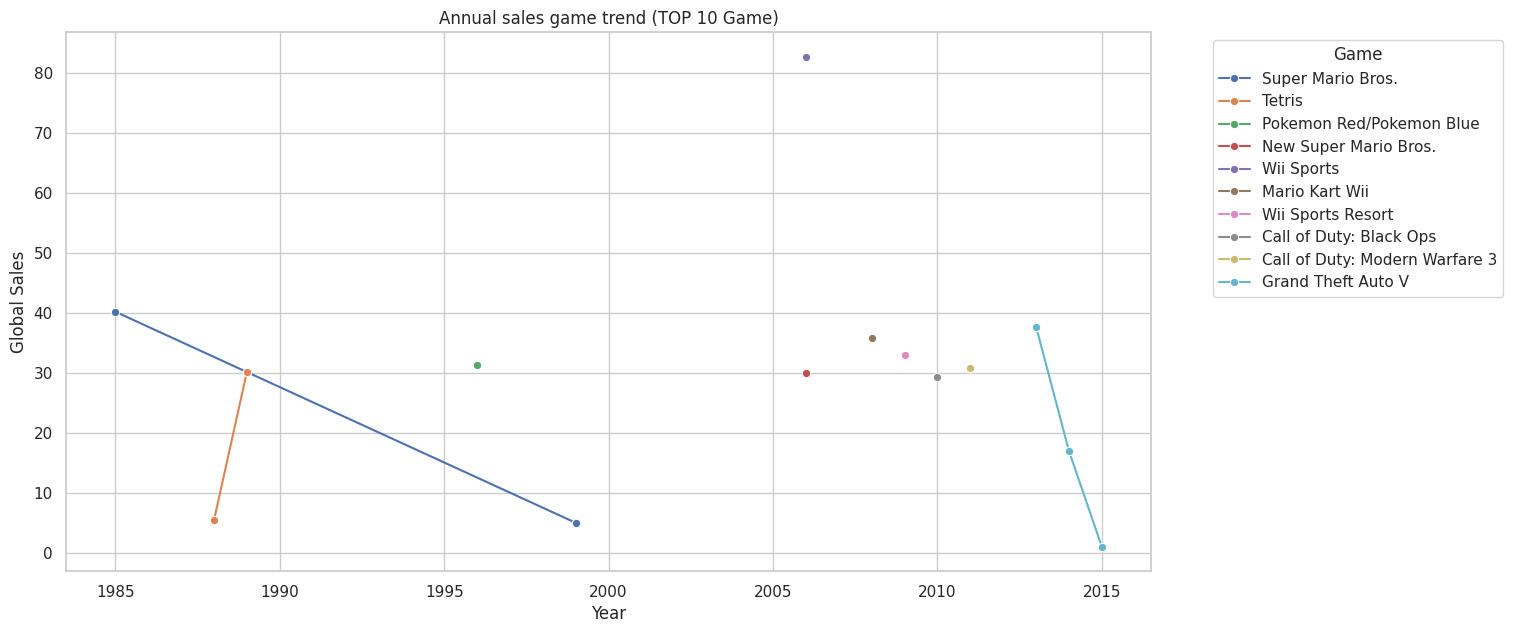

In [86]:
#Line chart trend penjualan top 10 games

top_games = df.groupby("Name")['Global_Sales'].sum().sort_values(ascending=False).head(10).index
sales_games_year = df[df['Name'].isin(top_games)].groupby(['Year','Name'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(
    data=sales_games_year,
    x="Year",
    y="Global_Sales",
    hue="Name",
    marker="o",
)
plt.title("Annual sales game trend (TOP 10 Game)")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.legend(title="Game", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("figures/Annual sales game trend(TOP 10 Game).png", dpi=300, bbox_inches="tight")
plt.show()
